# Importing Packages

In [63]:
import pandas as pd
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from PIL import Image

import re
import os
os.getcwd()

'/Users/rahulshelke/Documents/Data Science/Data Science Projects/bbc-news-sorting/notebooks'

In [2]:
# importing the zipfile module 
from zipfile import ZipFile 
import os
# loading the temp.zip and creating a zip object 
with ZipFile(os.path.join(os.getcwd() ,"data/learn-ai-bbc.zip"), 'r') as zObject: 
	# Extracting all the members of the zip 
	# into a specific location. 
	zObject.extractall(path=os.path.join(os.getcwd(), "data")) 


## Load the Dataset

In [4]:
DATA_PATH = os.path.join(os.getcwd(), "data")
# print(DATA_PATH)

In [209]:
test_df = pd.read_csv(os.path.join(DATA_PATH, "BBC News Test.csv"))
test_df.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [210]:
train_df = pd.read_csv(os.path.join(DATA_PATH, "BBC News Train.csv"))
train_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [211]:
train_df.shape

(1490, 3)

In [212]:
train_df["Category"].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

## Check with Each Category of Data

### 1. business

In [213]:
b_data = train_df[train_df["Category"] == "business"].copy()

b_data.shape

(336, 3)

In [214]:
b_data

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
4,917,enron bosses in $168m payout eighteen former e...,business
8,2034,car giant hit by mercedes slump a slump in pro...,business
...,...,...,...
1474,1257,indy buys into india paper irish publishing gr...,business
1479,2058,high fuel costs hit us airlines two of the lar...,business
1480,1124,qantas sees profits fly to record australian a...,business
1484,1774,hyundai to build new india plant south korea s...,business


In [215]:
print("First 10 samples of businees relates news samples\n".format(), b_data[:10])

First 10 samples of businees relates news samples
     ArticleId                                               Text  Category
0        1833  worldcom ex-boss launches defence lawyers defe...  business
1         154  german business confidence slides german busin...  business
2        1101  bbc poll indicates economic gloom citizens in ...  business
4         917  enron bosses in $168m payout eighteen former e...  business
8        2034  car giant hit by mercedes slump a slump in pro...  business
12       1028  uk coal plunges into deeper loss shares in uk ...  business
13        812  bp surges ahead on high oil price oil giant bp...  business
25       1561  china had role in yukos split-up china lent ru...  business
29       1503  iran budget seeks state sell-offs iran s presi...  business
32       2002  china continues rapid growth china s economy h...  business


**Data Containes:**

- Currancies
- Years
- Numbers
- Percentage

In [216]:
def remove_curruncies(text):
    """
    removes different curruancies from text
    e.g., $1,000, ₹500, €10.99

    Args: text (str)

    Returns: text (str)
    """
    try:
        # Currency regex pattern (includes symbols and codes)
        currency_pattern = r'[\₹\$\€\¥\£\₣\₽]?\d{1,3}(?:,\d{3})*(?:\.\d+)?(?:[mbn]{1,2})?|\b(?:USD|EUR|INR|GBP|JPY|CAD|AUD|CNY)\b|[\₹\$\€\¥\£\₣\₽]'


        currency_free_text = re.sub(currency_pattern, '', text)

        return currency_free_text
    except Exception as e:
        raise e

In [217]:
def remove_percentage(text):
    """ 
    removes percentages
    ex.,  25%, 5.5%, 1,000%
    """
    try:
        # Regex pattern to remove percentages
        percentage_pattern = r'\d{1,3}(?:,\d{3})*(?:\.\d+)?%'

        # Remove all percentage values
        cleaned_text = re.sub(percentage_pattern, '', text)

        return cleaned_text
    except Exception as e:
        raise e

In [218]:
def remove_numbers(text):
    """ 
    removes numbers from text
    ex., 
    - Integers (e.g., 100, 20)
    - Decimals (e.g., 5.5, 1000.99)
    - Numbers with commas (e.g., 1,000, 1,000,000)
    """
    try:
        # Regex pattern to remove numbers
        number_pattern = r'\b\d+(?:,\d{3})*(?:\.\d+)?\b'

        # Remove all numbers
        cleaned_text = re.sub(number_pattern, '', text)

        return cleaned_text
    except Exception as e:
        raise e

In [219]:
def remove_punctuation(text):
    """
    Removes all punctuation from the text.
    
    Args:
    text (str): Input string containing text with punctuation.
    
    Returns:
    str: Text with punctuation removed.
    """
    try:
        # Regex pattern to match any punctuation character
        punctuation_pattern = r'[' + re.escape(string.punctuation) + r']'
        
        # Replace all punctuation marks with an empty string
        cleaned_text = re.sub(punctuation_pattern, '', text)
        
        return cleaned_text
    except Exception as e:
        raise e

In [220]:
def remove_special_characters(text):
    """
    Removes special characters (non-alphanumeric characters) from the text.
    
    Args:
    text (str): Input string containing special characters.
    
    Returns:
    str: Text with special characters removed.
    """
    try:
        # Regex pattern to match any character that is not a letter or a digit
        special_characters_pattern = r'[^a-zA-Z0-9\s]'  # Allow only letters, digits, and spaces
        
        # Replace all special characters with an empty string
        cleaned_text = re.sub(special_characters_pattern, ' ', text)
        
        return cleaned_text
    except Exception as e:
        raise e

In [221]:
def remove_multiple_spaces(text):
    """
    removes multiple spaces
    """
    try:
        cleaned_text = re.sub(r'\s+', ' ', text)
        return cleaned_text
    except Exception as e:
        raise e

In [222]:
b_data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
4,917,enron bosses in $168m payout eighteen former e...,business
8,2034,car giant hit by mercedes slump a slump in pro...,business


In [223]:
# normalizing
b_data["clean"] = b_data["Text"].map(lambda x : x.lower())

# remove curruncies
b_data["clean"] = b_data["clean"].map(lambda x : remove_curruncies(x))

# remove percentage
b_data["clean"] = b_data["clean"].map(lambda x : remove_percentage(x))

# remove numbers
b_data["clean"] = b_data["clean"].map(lambda x : remove_numbers(x))

# remove special characters
b_data["clean"] = b_data["clean"].map(lambda x : remove_special_characters(x))

# remove punctuations
b_data["clean"] = b_data["clean"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
b_data["clean"] = b_data["clean"].map(lambda x : remove_multiple_spaces(x))

In [224]:
b_data

,ArticleId,Text,Category,clean
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex boss launches defence lawyers defe...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in payout eighteen former enron d...
8,2034,car giant hit by mercedes slump a slump in pro...,business,car giant hit by mercedes slump a slump in pro...
...,...,...,...,...
1474,1257,indy buys into india paper irish publishing gr...,business,indy buys into india paper irish publishing gr...
1479,2058,high fuel costs hit us airlines two of the lar...,business,high fuel costs hit us airlines two of the lar...
1480,1124,qantas sees profits fly to record australian a...,business,qantas sees profits fly to record australian a...
1484,1774,hyundai to build new india plant south korea s...,business,hyundai to build new india plant south korea s...


In [225]:
import random

for i in range(10):
    num = random.randint(0, b_data.shape[0])
    length = len(b_data.iloc[num][1])
    print(f"Text {num}: {b_data.iloc[num][1]}")
    print()
    print(f"Clean: {b_data.iloc[num][3]}")
    print('='*length)

Text 97: deutsche attacks yukos case german investment bank deutsche bank has challenged the right of yukos to claim bankruptcy protection in the us.  in a court filing on tuesday  it said the russian oil giant has few texas ties beyond bank accounts and a texas-based finance chief. deutsche bank claimed yukos had artificially manufactured a legal case to stop the sale of its main asset. it had wanted to help fund gazprom s plans for a $10bn (£5.18bn) bid for yukos unit yuganskneftegas.  deutsche bank would have earned large fees from the deal  which could not be carried out because us chapter 11 bankruptcy rules made the kremlin s auction of yuganskneftegas on 19 december illegal under us law.  but the us bankruptcy court judge in texas granted yukos an injunction that barred gazprom and its lenders from taking part. yuganskneftegas will ultimately end up with gazprom. the winning bidder at the auction was a previously unknown firm  baikal finance group  which was snapped up days late

In [226]:
#WordCloud Visualizations
#Method for creating wordclouds

def display_cloud(data):
    """
    Generates and displays a word cloud based on input text data with a specified image mask and contour color.

    This function uses the WordCloud library to generate a visual representation of word frequencies in the 
    input text data. The word cloud is displayed using matplotlib, and it can be customized with an image 
    mask (if provided), background color, contour width, and contour color.

    Parameters:
    -----------
    data : pd.Series
        The input text data to be used for generating the word cloud. It can be a list of words or a single 
        string of text. The words in the input will be tokenized and used to determine the size of each word 
        in the cloud based on frequency.
    
    img_path : str
        The file path to an image that can be used as a mask for the word cloud shape. This image will dictate 
        the form of the word cloud. If not needed, this parameter can be left commented out or set to None 
        (currently not used in this version).

    color : str
        The color to be used for the contour of the word cloud. The contour color will be applied around 
        the edges of the cloud. Typical values could be any valid Matplotlib color (e.g., 'blue', 'red', 
        'green', etc.).

    Returns:
    --------
    None
        The function does not return anything. It generates a word cloud and displays it using matplotlib.
    """
    plt.subplots(figsize=(10,10))
    # mask = np.array(Image.open(img_path))
    wc = WordCloud(stopwords=stopwords.words(), 
                   background_color="black", 
                   max_words=100, max_font_size=256,
                   random_state=42
                   )
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

Word Cloud of Business Category


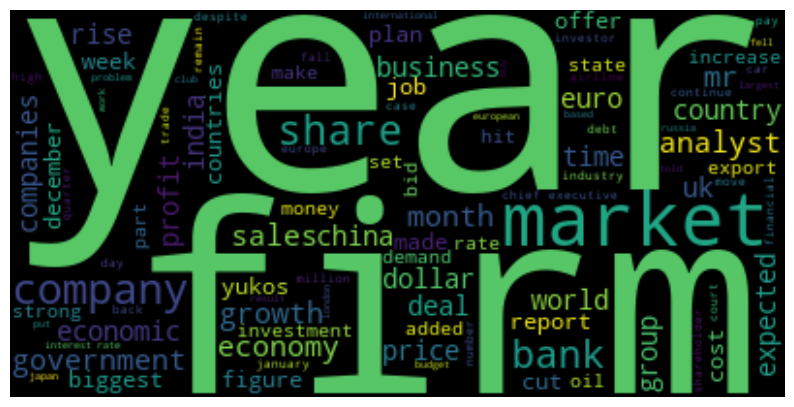

In [227]:
print("Word Cloud of Business Category")
display_cloud(b_data['clean'])

### 2. entertainment

In [228]:
e_data = train_df[train_df["Category"] == "entertainment"].copy()

e_data.shape

(273, 3)

In [229]:
e_data

,ArticleId,Text,Category
7,1797,french honour for director parker british film...,entertainment
9,1866,fockers fuel festive film chart comedy meet th...,entertainment
11,1153,housewives lift channel 4 ratings the debut of...,entertainment
16,342,u2 s desire to be number one u2 who have won ...,entertainment
21,177,carry on star patsy rowlands dies actress pats...,entertainment
...,...,...,...
1462,605,da vinci code is lousy history the plot of a...,entertainment
1476,783,bollywood draws global stars british actress a...,entertainment
1483,1904,beastie boys win sampling battle us rappers be...,entertainment
1485,857,double eviction from big brother model caprice...,entertainment


In [230]:
print("First 10 samples of entertainment relates news samples\n".format(), e_data[:10])

First 10 samples of entertainment relates news samples
     ArticleId                                               Text  \
7        1797  french honour for director parker british film...   
9        1866  fockers fuel festive film chart comedy meet th...   
11       1153  housewives lift channel 4 ratings the debut of...   
16        342  u2 s desire to be number one u2  who have won ...   
21        177  carry on star patsy rowlands dies actress pats...   
31       1407  rapper snoop dogg sued for  rape  us rapper sn...   
35        687  musical treatment for capra film the classic f...   
44       1522  obituary: dame alicia markova dame alicia mark...   
45        455  tv station refuses adoption show a tv station ...   
55       1418  blair buys copies of new band aid prime minist...   

         Category  
7   entertainment  
9   entertainment  
11  entertainment  
16  entertainment  
21  entertainment  
31  entertainment  
35  entertainment  
44  entertainment  
45  entertainme

**Data Containes:**

- Currancies
- Years/ Centuries (18th, 21st)
- Percentage
- distance (30ft, 10m)
- Numbers 

In [231]:
def remove_distances(text):
    """
    Removes distances from the text (e.g., 30ft, 10m, 5km, etc.).
    
    Args:
    text (str): Input string containing distances.
    
    Returns:
    str: Text with distances removed.
    """
    try:
        # Regex pattern to match distances (integers or decimals followed by distance units)
        distance_pattern = r'\d+(?:\.\d+)?\s*(ft|m|km|cm|mm|yd|mi)\b'
        
        # Replace all occurrences of the distance pattern with an empty string
        cleaned_text = re.sub(distance_pattern, '', text)
        
        return cleaned_text
    except Exception as e:
        raise e

In [232]:
def remove_centuries(text):
    """
    Removes centuries (e.g., 18th, 21st) from the text.
    
    Args:
    text (str): Input string containing centuries.
    
    Returns:
    str: Text with centuries removed.
    """
    try:
        # Regex pattern to match centuries (e.g., 18th, 21st, 5th, 20th)
        century_pattern = r'\d{1,2}(st|nd|rd|th)\b'
        
        # Replace all occurrences of centuries with an empty string
        cleaned_text = re.sub(century_pattern, '', text)
        
        return cleaned_text
    except Exception as e:
        raise e

In [233]:
# normalizing
e_data["clean"] = e_data["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
e_data["clean"] = e_data["clean"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
e_data["clean"] = e_data["clean"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
e_data["clean"] = e_data["clean"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
e_data["clean"] = e_data["clean"].map(lambda x : remove_centuries(x))

# remove numbers
e_data["clean"] = e_data["clean"].map(lambda x : remove_numbers(x))

# remove special characters
e_data["clean"] = e_data["clean"].map(lambda x : remove_special_characters(x))

# remove punctuations
e_data["clean"] = e_data["clean"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
e_data["clean"] = e_data["clean"].map(lambda x : remove_multiple_spaces(x))

In [234]:
e_data.head()

,ArticleId,Text,Category,clean
7,1797,french honour for director parker british film...,entertainment,french honour for director parker british film...
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,fockers fuel festive film chart comedy meet th...
11,1153,housewives lift channel 4 ratings the debut of...,entertainment,housewives lift channel ratings the debut of u...
16,342,u2 s desire to be number one u2 who have won ...,entertainment,u s desire to be number one u who have won thr...
21,177,carry on star patsy rowlands dies actress pats...,entertainment,carry on star patsy rowlands dies actress pats...


In [235]:
import random

for i in range(10):
    num = random.randint(0, e_data.shape[0])
    length = len(e_data.iloc[num][1])
    print(f"Text {num}: {e_data.iloc[num][1]}")
    print()
    print(f"Clean: {e_data.iloc[num][3]}")
    print('='*length)

Text 257: t in the park sells out in days tickets for scotland s biggest music festival have sold out in record time  five months before the event is held.  the 12th annual t in the park festival  which takes place at balado near kinross in july  sold out just four days after the line-up was announced. green day  the foo fighters and keane are among the acts that had already been lined up to appear at the event. however  the organisers have revealed scots favourites travis as well as soulman james brown will also appear.  last year tickets sold out 10 weeks before the festival but organisers confirmed that all 130 000 for the two-day event had been sold. geoff ellis  ceo of festival organisers big day out ltd  said this year s event promises to be the best yet.  after last year s sell-out  we did think this year s event would sell slightly earlier  however this is way beyond our expectations   mr ellis said.   we are extremely proud that fans are so excited about t in the park that the

Word Cloud of Entertainment Category


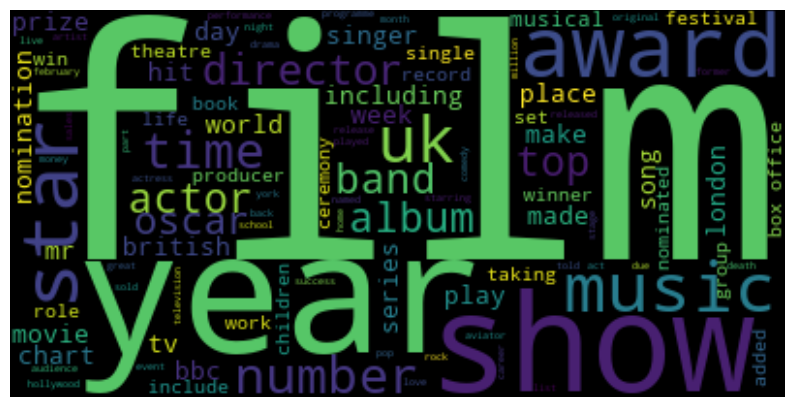

In [236]:
print("Word Cloud of Entertainment Category")
display_cloud(e_data['clean'])

### 3. politics

In [237]:
p_data = train_df[train_df["Category"] == "politics"].copy()

p_data.shape

(274, 3)

In [238]:
p_data

,ArticleId,Text,Category
5,1582,howard truanted to play snooker conservative...,politics
10,1683,blair rejects iraq advice calls tony blair has...,politics
28,1527,uk will stand firm on eu rebate britain s £3b...,politics
33,2100,security papers found in street an inquiry i...,politics
52,1763,mps quiz aides over royal income senior offici...,politics
...,...,...,...
1456,955,blair told to double overseas aid tony blair i...,politics
1463,2102,abbas will not tolerate attacks palestinian ...,politics
1472,1806,kelly trails new discipline power teachers cou...,politics
1475,980,budget to set scene for election gordon brown ...,politics


In [239]:
print("First 10 samples of politics relates news samples\n".format(), p_data[:10])

First 10 samples of politics relates news samples
     ArticleId                                               Text  Category
5        1582  howard  truanted to play snooker  conservative...  politics
10       1683  blair rejects iraq advice calls tony blair has...  politics
28       1527  uk will stand firm on eu rebate  britain s £3b...  politics
33       2100  security papers  found in street  an inquiry i...  politics
52       1763  mps quiz aides over royal income senior offici...  politics
58       1518  tory backing for id cards the tories are to ba...  politics
66       1079  stalemate in pension strike talks talks aimed ...  politics
67        947  tories outlining policing plans local communit...  politics
82        105  howard pitches for uk ethnic vote michael howa...  politics
83       1297  clarke to press on with id cards new home secr...  politics


**Data Containes:**

- Currancies
- Years
- Percentage
- Numbers 

In [240]:
# normalizing
p_data["clean"] = p_data["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
p_data["clean"] = p_data["clean"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
p_data["clean"] = p_data["clean"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
p_data["clean"] = p_data["clean"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
p_data["clean"] = p_data["clean"].map(lambda x : remove_centuries(x))

# remove numbers
p_data["clean"] = p_data["clean"].map(lambda x : remove_numbers(x))

# remove special characters
p_data["clean"] = p_data["clean"].map(lambda x : remove_special_characters(x))

# remove punctuations
p_data["clean"] = p_data["clean"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
p_data["clean"] = p_data["clean"].map(lambda x : remove_multiple_spaces(x))

In [241]:
p_data.head()

,ArticleId,Text,Category,clean
5,1582,howard truanted to play snooker conservative...,politics,howard truanted to play snooker conservative l...
10,1683,blair rejects iraq advice calls tony blair has...,politics,blair rejects iraq advice calls tony blair has...
28,1527,uk will stand firm on eu rebate britain s £3b...,politics,uk will stand firm on eu rebate britain s eu r...
33,2100,security papers found in street an inquiry i...,politics,security papers found in street an inquiry is ...
52,1763,mps quiz aides over royal income senior offici...,politics,mps quiz aides over royal income senior offici...


In [242]:
import random

for i in range(10):
    num = random.randint(0, p_data.shape[0])
    length = len(p_data.iloc[num][1])
    print(f"Text {num}: {p_data.iloc[num][1]}")
    print()
    print(f"Clean: {p_data.iloc[num][3]}")
    print('='*length)

Text 245: hague s six-figure earnings shown the rewards of leaving front-bench politics are shown in the latest annual register of members  interests.  the register shows former tory leader william hague earning up to £820 000 on top of his mps  salary  much of it from speaking fees. his former shadow chancellor michael portillo makes up to £560 000 a year - partly because of speeches and tv work. ex-health secretary alan milburn earned up to £85 000 from speeches  articles and advice while not in the cabinet.  mr milburn was away from the frontbench for just more than a year between stepping down as health secretary and becoming labour s election supremo. his declared interests include £20 000 from newspaper articles and fees of up to £35 000 for four speeches. he also commanded a salary of between £25 000 and £35 000 for being on investment company bridgepoint capital s european advisory committee. his time out of office will  however  have lost him his £71 433 minister s salary. mr 

IndexError: single positional indexer is out-of-bounds

Word Cloud of Politics Category


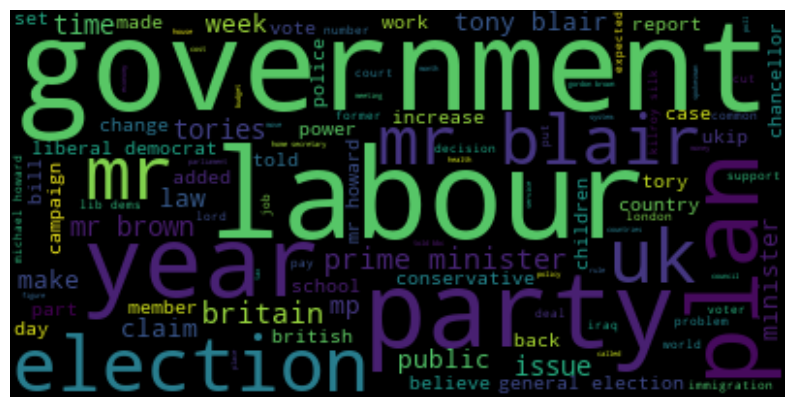

In [183]:
print("Word Cloud of Politics Category")
display_cloud(p_data['clean'])

### 4. sport

In [243]:
s_data = train_df[train_df["Category"] == "sport"].copy()

s_data.shape

(346, 3)

In [244]:
print("First 10 samples of sport relates news samples\n".format(), s_data[:10])

First 10 samples of sport relates news samples
     ArticleId                                               Text Category
6         651  wales silent on grand slam talk rhys williams ...    sport
14        707  ireland 21-19 argentina an injury-time dropped...    sport
15       1588  wenger signs new deal arsenal manager arsene w...    sport
17        486  hantuchova in dubai last eight daniela hantuch...    sport
18       1344  melzer shocks agassi in san jose second seed a...    sport
20       1547  hewitt overcomes wobble in sydney lleyton hewi...    sport
22       1785  serena becomes world number two serena william...    sport
23       1617  ferguson urges henry punishment sir alex fergu...    sport
27       1026  henman to face saulnier test british number on...    sport
34        466  philippoussis doubt over open bid mark philipp...    sport


**Data Containes:**

- Currancies
- Years
- Percentage
- Numbers 

In [245]:
# normalizing
s_data["clean"] = s_data["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
s_data["clean"] = s_data["clean"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
s_data["clean"] = s_data["clean"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
s_data["clean"] = s_data["clean"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
s_data["clean"] = s_data["clean"].map(lambda x : remove_centuries(x))

# remove numbers
s_data["clean"] = s_data["clean"].map(lambda x : remove_numbers(x))

# remove special characters
s_data["clean"] = s_data["clean"].map(lambda x : remove_special_characters(x))

# remove punctuations
s_data["clean"] = s_data["clean"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
s_data["clean"] = s_data["clean"].map(lambda x : remove_multiple_spaces(x))

In [246]:
s_data.head()

,ArticleId,Text,Category,clean
6,651,wales silent on grand slam talk rhys williams ...,sport,wales silent on grand slam talk rhys williams ...
14,707,ireland 21-19 argentina an injury-time dropped...,sport,ireland argentina an injury time dropped goal ...
15,1588,wenger signs new deal arsenal manager arsene w...,sport,wenger signs new deal arsenal manager arsene w...
17,486,hantuchova in dubai last eight daniela hantuch...,sport,hantuchova in dubai last eight daniela hantuch...
18,1344,melzer shocks agassi in san jose second seed a...,sport,melzer shocks agassi in san jose second seed a...


In [247]:
import random

for i in range(10):
    num = random.randint(0, s_data.shape[0])
    length = len(s_data.iloc[num][1])
    print(f"Text {num}: {s_data.iloc[num][1]}")
    print()
    print(f"Clean: {s_data.iloc[num][3]}")
    print('='*length)

Text 192: o connell rejects lions rumours ireland and munster lock paul o connell has dismissed media reports linking him to the captaincy of the lions tour to new zealand this summer.  o connell is rumoured to be among the front-runners for the job  but says he is totally focused on sunday s six nations crunch clash with england.  i honestly don t think about these reports   he told bbc sport.  the lions thing is all speculation and newspaper talk  nothing more. i just ignore it and get on with my job.  he added:  the only thing that annoys me after reading some reports is what the opposition locks think.  i can just imagine them saying  i m going to show this guy what s what about second row play . that s the one thing that makes me cringe.  o connell  who made a try-scoring international debut against wales two years ago  is enjoying his meteoric rise into rugby s shop window - but refuses to be drawn on the lions.   i have spoken to sir clive woodward a few times  but not for very 

Word Cloud of Sport Category


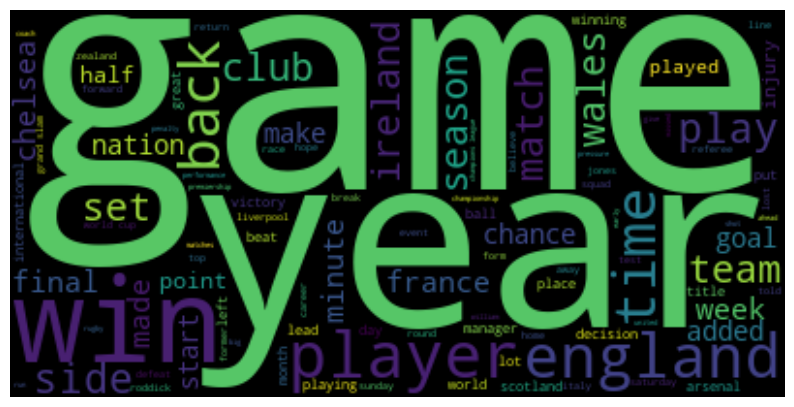

In [248]:
print("Word Cloud of Sport Category")
display_cloud(s_data['clean'])

### 5. tech

In [249]:
t_data = train_df[train_df["Category"] == "tech"].copy()

t_data.shape

(261, 3)

In [250]:
print("First 10 samples of tech relates news samples\n".format(), t_data[:10])

First 10 samples of tech relates news samples
     ArticleId                                               Text Category
3        1976  lifestyle  governs mobile choice  faster  bett...     tech
19       1552  moving mobile improves golf swing a mobile pho...     tech
24        405  bt boosts its broadband packages british telec...     tech
26        702  peer-to-peer nets  here to stay  peer-to-peer ...     tech
30       1951  pompeii gets digital make-over the old-fashion...     tech
39       1532  security scares spark browser fix microsoft is...     tech
40       2205  argonaut founder rebuilds empire jez san  the ...     tech
43       1394  viewers to be able to shape tv imagine editing...     tech
46        593  china  ripe  for media explosion asia is set t...     tech
47        590  broadband fuels online change fast web access ...     tech


**Data Containes:**

- Currancies
- Years
- Percentage
- Numbers 

In [251]:
# normalizing
t_data["clean"] = t_data["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
t_data["clean"] = t_data["clean"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
t_data["clean"] = t_data["clean"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
t_data["clean"] = t_data["clean"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
t_data["clean"] = t_data["clean"].map(lambda x : remove_centuries(x))

# remove numbers
t_data["clean"] = t_data["clean"].map(lambda x : remove_numbers(x))

# remove special characters
t_data["clean"] = t_data["clean"].map(lambda x : remove_special_characters(x))

# remove punctuations
t_data["clean"] = t_data["clean"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
t_data["clean"] = t_data["clean"].map(lambda x : remove_multiple_spaces(x))

In [252]:
t_data.head()

,ArticleId,Text,Category,clean
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
19,1552,moving mobile improves golf swing a mobile pho...,tech,moving mobile improves golf swing a mobile pho...
24,405,bt boosts its broadband packages british telec...,tech,bt boosts its broadband packages british telec...
26,702,peer-to-peer nets here to stay peer-to-peer ...,tech,peer to peer nets here to stay peer to peer pp...
30,1951,pompeii gets digital make-over the old-fashion...,tech,pompeii gets digital make over the old fashion...


In [253]:
import random

for i in range(10):
    num = random.randint(0, t_data.shape[0])
    length = len(t_data.iloc[num][1])
    print(f"Text {num}: {t_data.iloc[num][1]}")
    print()
    print(f"Clean: {t_data.iloc[num][3]}")
    print('='*length)

Text 32: looks and music to drive mobiles mobile phones are still enjoying a boom time in sales  according to research from technology analysts gartner.  more than 674 million mobiles were sold last year globally  said the report  the highest total sold to date. the figure was 30% more than in 2003 and surpassed even the most optimistic predictions  gartner said. good design and the look of a mobile  as well as new services such as music downloads  could go some way to pushing up sales in 2005  said analysts. although people were still looking for better replacement phones  there was evidence  according to gartner  that some markets were seeing a slow-down in replacement sales.   all the markets grew apart from japan which shows that replacement sales are continuing in western europe   mobile analyst carolina milanesi told the bbc news website.  japan is where north america and western european markets can be in a couple of years  time.  they already have tv  music  ringtones  cameras 

Word Cloud of Tech Category


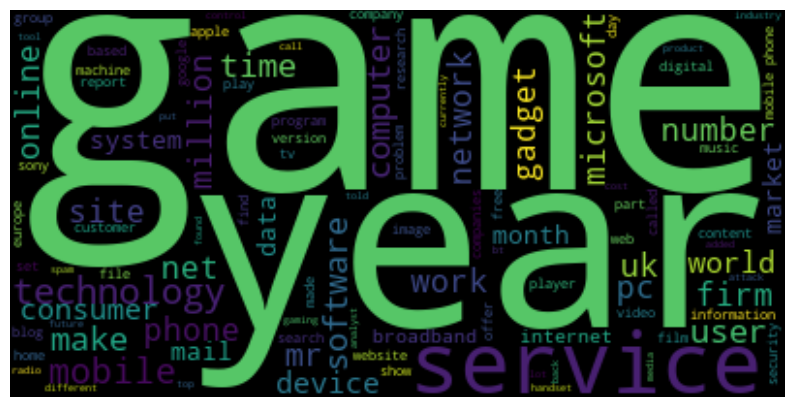

In [254]:
print("Word Cloud of Tech Category")
display_cloud(t_data['clean'])

## Full Text Cleaning

In [255]:
train_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [256]:
# normalizing
train_df["clean_text"] = train_df["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
train_df["clean_text"] = train_df["clean_text"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
train_df["clean_text"] = train_df["clean_text"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
train_df["clean_text"] = train_df["clean_text"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
train_df["clean_text"] = train_df["clean_text"].map(lambda x : remove_centuries(x))

# remove numbers
train_df["clean_text"] = train_df["clean_text"].map(lambda x : remove_numbers(x))

# remove special characters
train_df["clean_text"] = train_df["clean_text"].map(lambda x : remove_special_characters(x))

# remove punctuations
train_df["clean_text"] = train_df["clean_text"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
train_df["clean_text"] = train_df["clean_text"].map(lambda x : remove_multiple_spaces(x))

In [257]:
train_df.head()

,ArticleId,Text,Category,clean_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex boss launches defence lawyers defe...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in payout eighteen former enron d...


In [258]:
import random

for i in range(10):
    num = random.randint(0, train_df.shape[0])
    length = len(train_df.iloc[num][1])
    print(f"Text {num}: {train_df.iloc[num][1]}")
    print()
    print(f"Clean: {train_df.iloc[num][3]}")
    print('='*length)

Text 268: broadband steams ahead in the us more and more americans are joining the internet s fast lane  according to official figures.  the number of people and business connected to broadband jumped by 38% in a year  said the us federal communications commission (fcc). in a report  it said there were more than 32 million broadband connections by the end of june 2004. but the us is still behind compared to other nations  ranked 13th in the world by a un telecoms body.  during his 2004 re-election campaign  president george w bush pledge to ensure that affordable high-speed net access would be available to all americans by 2007.  according to the report by the fcc  broadband is becoming increasingly popular  with people using it for research and shopping  as well as downloading music and watching video. the total number of people and businesses on broadband rose by to 32.5 million in the year ending june 2004  compared to 23.5 million in june 2003. whereas in the uk  most people hook u

In [259]:
train_df.head()

,ArticleId,Text,Category,clean_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex boss launches defence lawyers defe...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in payout eighteen former enron d...


Word Cloud of All Category


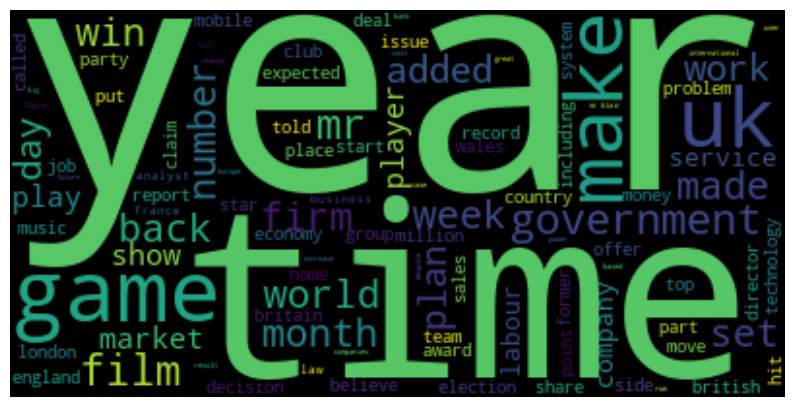

In [261]:
print("Word Cloud of All Category")
display_cloud(train_df['clean_text'])

## Label Encoding

In [262]:
train_df.head()

,ArticleId,Text,Category,clean_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex boss launches defence lawyers defe...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in payout eighteen former enron d...


In [263]:
category_label = {}
for index, category in enumerate(train_df["Category"].unique()):
    print(index, ':', category)
    category_label.update({category : index})

train_df["Label"] = train_df["Category"].map(lambda x : category_label[x])

0 : business
1 : tech
2 : politics
3 : sport
4 : entertainment


In [264]:
train_df.head()

,ArticleId,Text,Category,clean_text,Label
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex boss launches defence lawyers defe...,0
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...,1
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in payout eighteen former enron d...,0


## Cleaning Test Data

In [265]:
# normalizing
test_df["clean_text"] = test_df["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
test_df["clean_text"] = test_df["clean_text"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
test_df["clean_text"] = test_df["clean_text"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
test_df["clean_text"] = test_df["clean_text"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
test_df["clean_text"] = test_df["clean_text"].map(lambda x : remove_centuries(x))

# remove numbers
test_df["clean_text"] = test_df["clean_text"].map(lambda x : remove_numbers(x))

# remove special characters
test_df["clean_text"] = test_df["clean_text"].map(lambda x : remove_special_characters(x))

# remove punctuations
test_df["clean_text"] = test_df["clean_text"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
test_df["clean_text"] = test_df["clean_text"].map(lambda x : remove_multiple_spaces(x))

In [266]:
test_df.head()

,ArticleId,Text,clean_text
0,1018,qpr keeper day heads for preston queens park r...,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...,boro suffer morrison injury blow middlesbrough...


In [267]:
train_df.to_csv("data/train_clean_data.csv",index=False)
test_df.to_csv("data/test_clean_data.csv",index=False)